In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [17]:
data = pd.read_csv("./StressLevelDataset.csv")

In [18]:
# data = scipy.io.loadmat('./MNIST.mat')
# X = data['X'].T
# y = data['I'][0]
X = data.drop('stress_level', axis=1)
y = data['stress_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

In [23]:
def evaluate_model(name, y_test, y_pred):
    model_list.append(name)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", conf_matrix)


## Multinomial Naive Bayes¶

MultinomiatNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice). The distribution is parametrized by vectors $\theta_y=\left(\theta_{y 1}, \ldots, \theta_{y n}\right)$ for each class $y$, where $n$ is the number of features (in text classification, the size of the vocabulary) and $\theta_{y i}$ is the probability $P\left(x_i \mid y\right)$ of feature $i$ appearing in a sample belonging to class $y$.

The parameters $\theta_y$ is estimated by a smoothed version of maximum likelihood, i.e. relative frequency counting:
$$
\hat{\theta}_{y i}=\frac{N_{y i}+\alpha}{N_y+\alpha n}
$$
where $N_{y i}=\sum_{x \in T} x_i$ is the number of times feature $i$ appears in a sample of class $y$ in the training set $T$, and $N_y=\sum_{i=1}^n N_{y i}$ is the total count of all features for class $y$.

The smoothing priors $\alpha \geq 0$ accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting $\alpha=1$ is called Laplace smoothing, while $\alpha<1$ is called Lidstone smoothing.

In [24]:
# Create a Multinomial Naive Bayes classifier
mnb_model = MultinomialNB()

# Train the model
mnb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = mnb_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Multinomial Naive Bayes', y_test, y_pred)

Accuracy: 0.8909090909090909
Precision: 0.9010256676352566
Recall: 0.8909090909090909
F1 Score: 0.8922202817240578
Confusion Matrix:
 [[67  0  9]
 [ 3 62  8]
 [ 3  1 67]]


## Gaussian Naive Bayes

GaussianNB implements the Gaussian Naive Bayes algorithm for classification. The likelihood of the features is assumed to be Gaussian:
$$
P\left(x_i \mid y\right)=\frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(-\frac{\left(x_i-\mu_y\right)^2}{2 \sigma_y^2}\right)
$$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [25]:
gnb_model = GaussianNB()

# Train the model
gnb_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = gnb_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Gaussian Naive Bayes', y_test, y_pred)

Accuracy: 0.9
Precision: 0.9157235769991853
Recall: 0.9
F1 Score: 0.9018102420303007
Confusion Matrix:
 [[68  0  8]
 [ 1 61 11]
 [ 2  0 69]]


## Complement Naive Bayes

ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets. Specifically, CNB uses statistics from the complement of each class to compute the model's weights. The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB. Further, CNB regularly outperforms MNB (often by a considerable margin) on text classification tasks. The procedure for calculating the weights is as follows:
$$
\begin{array}{r}
\hat{\theta}_{c i}=\frac{\alpha_i+\sum_{j: y_j \neq c} d_{i j}}{\alpha+\sum_{j: y_j \neq c} \sum_k d_{k j}} \\
w_{c i}=\log \hat{\theta}_{c i} \\
w_{c i}=\frac{w_{c i}}{\sum_j\left|w_{c j}\right|}
\end{array}
$$
where the summations are over all documents $j$ not in class $c, d_{i j}$ is either the count or tf-idf value of term $i$ in document $j, \alpha_i$ is a smoothing hyperparameter like that found in MNB, and $\alpha=\sum_i \alpha_i$. The second normalization addresses the tendency for longer documents to dominate parameter estimates in MNB. The classification rule is:
$$
\hat{c}=\arg \min _c \sum_i t_i w_{c i}
$$
i.e., a document is assigned to the class that is the poorest complement match.

In [26]:
cpl_model = ComplementNB()

# Train the model
cpl_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = cpl_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Complement Naive Bayes', y_test, y_pred)

Accuracy: 0.65
Precision: 0.7573487882833677
Recall: 0.65
F1 Score: 0.5678733521264612
Confusion Matrix:
 [[67  0  9]
 [35  8 30]
 [ 3  0 68]]


## Bernoulli Naive Bayes

BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

The decision rule for Bernoulli naive Bayes is based on

$$
P\left(x_i \mid y\right)=P\left(x_i=1 \mid y\right) x_i+\left(1-P\left(x_i=1 \mid y\right)\right)\left(1-x_i\right)
$$

which differs from multinomial NB's rule in that it explicitly penalizes the non-occurrence of a feature $i$ that is an indicator for class $y$, where the multinomial variant would simply ignore a non-occurring feature.

In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. Bernoul liNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

In [27]:
ber_model = BernoulliNB()

# Train the model
ber_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = ber_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Bernoulli Naive Bayes', y_test, y_pred)

Accuracy: 0.8772727272727273
Precision: 0.8878099173553718
Recall: 0.8772727272727273
F1 Score: 0.8784889300724756
Confusion Matrix:
 [[71  0  5]
 [ 7 61  5]
 [10  0 61]]


## Categorical Naive Bayes

CategoricaLNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature, which is described by the index $i$, has its own categorical distribution.

For each feature $i$ in the training set $X$, CategoricalNB estimates a categorical distribution for each feature $\mathrm{i}$ of $\mathrm{X}$ conditioned on the class $y$. The index set of the samples is defined as $J=\{1, \ldots, m\}$, with $m$ as the number of samples.

The probability of category $t$ in feature $i$ given class $c$ is estimated as:
$$
P\left(x_i=t \mid y=c ; \alpha\right)=\frac{N_{t i c}+\alpha}{N_c+\alpha n_i}
$$
where $N_{t i c}=\left|\left\{j \in J \mid x_{i j}=t, y_j=c\right\}\right|$ is the number of times category $t$ appears in the samples $x_i$, which belong to class $c$, $N_c=\left|\left\{j \in J \mid y_j=c\right\}\right|$ is the number of samples with class c, $\alpha$ is a smoothing parameter and $n_i$ is the number of available categories of feature $i$.

CategoricalNB assumes that the sample matrix $X$ is encoded (for instance with the help of OrdinalEncoder) such that all categories for each feature $i$ are represented with numbers $0, \ldots, n_i-1$ where $n_i$ is the number of available categories of feature $i$.

In [28]:
cate_model = CategoricalNB()

# Train the model
cate_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = cate_model.predict(X_test_scaled)

# Evaluate the model
evaluate_model('Categorical Naive Bayes', y_test, y_pred)

Accuracy: 0.8727272727272727
Precision: 0.8765404884970102
Recall: 0.8727272727272727
F1 Score: 0.8733178346763165
Confusion Matrix:
 [[64  2 10]
 [ 3 65  5]
 [ 2  6 63]]


In [31]:
model_list

['Multinomial Naive Bayes',
 'Gaussian Naive Bayes',
 'Complement Naive Bayes',
 'Bernoulli Naive Bayes',
 'Categorical Naive Bayes']

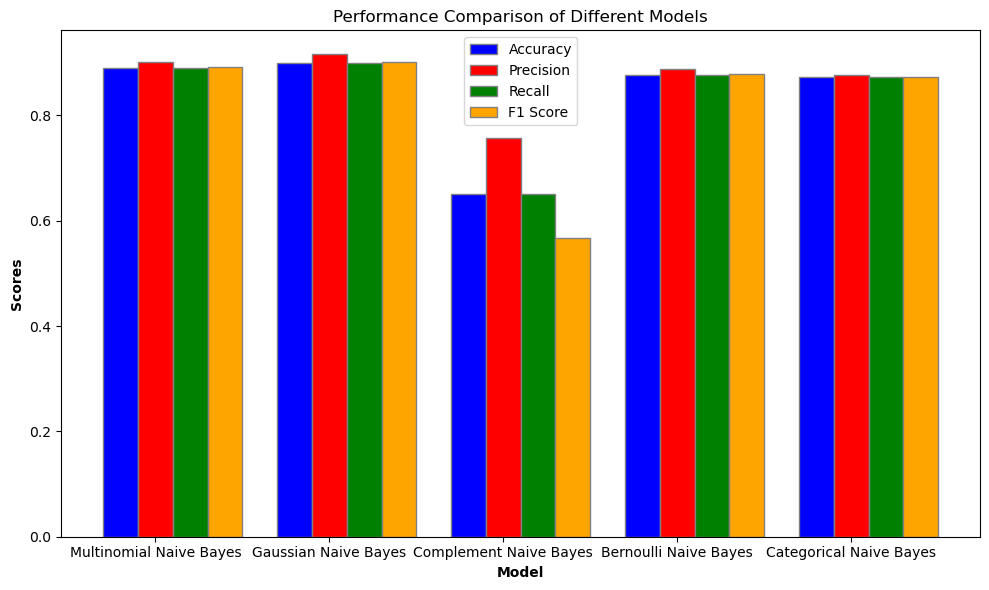

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration


# Number of models
n_models = len(model_list)

# Creating bar positions
barWidth = 0.2
r1 = np.arange(n_models)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy_list, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision_list, color='red', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall_list, color='green', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_list, color='orange', width=barWidth, edgecolor='grey', label='F1 Score')

# Adding labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.xticks([r + barWidth for r in range(n_models)], model_list)

# Creating legend & title
plt.title('Performance Comparison of Different Models')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Why is Gaussian Naive Bayes the most accurate?

## Binary Features: 
### The MNIST dataset mainly consists of binary (black and white) images, which aligns perfectly with the BernoulliNB algorithm's ability to handle binary features. In the MNIST dataset, each pixel is typically processed as either having ink or not (i.e., black or white), which matches the expected input for BernoulliNB.

## Adaptation to Discrete Features: 
### Each pixel in the MNIST dataset can be considered a discrete feature. BernoulliNB is particularly well-suited for handling such binary, discrete features.

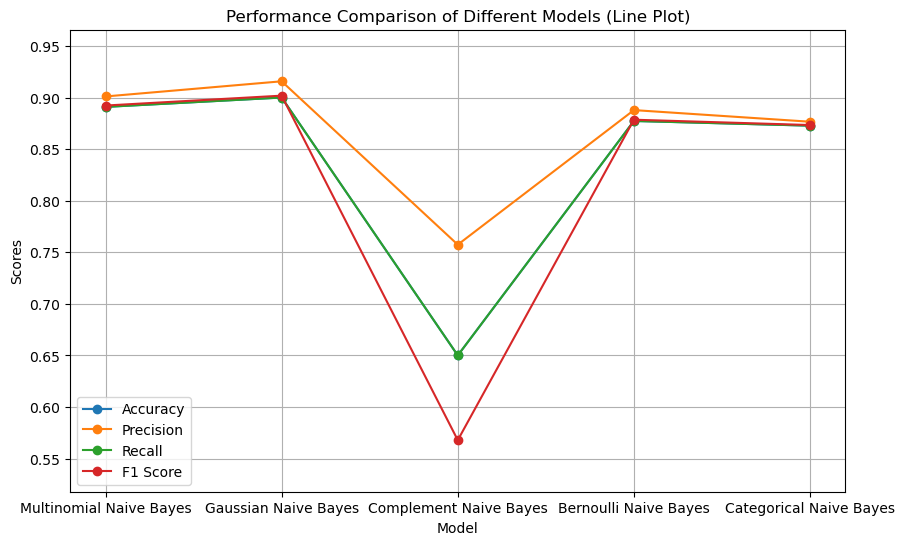

In [30]:
# Finding the min and max values among all scores to set y-axis limits
min_score = min(min(accuracy_list), min(precision_list), min(recall_list), min(f1_list))
max_score = max(max(accuracy_list), max(precision_list), max(recall_list), max(f1_list))

# Adding a small buffer to min and max values for better visualization
buffer = 0.05
y_min = max(0, min_score - buffer)  # Ensuring y_min is not less than 0
y_max = min(1, max_score + buffer)  # Ensuring y_max does not exceed 1

# Creating the line plot with adjusted y-axis limits
plt.figure(figsize=(10, 6))
plt.plot(model_list, accuracy_list, label='Accuracy', marker='o')
plt.plot(model_list, precision_list, label='Precision', marker='o')
plt.plot(model_list, recall_list, label='Recall', marker='o')
plt.plot(model_list, f1_list, label='F1 Score', marker='o')

plt.title('Performance Comparison of Different Models (Line Plot)')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.ylim(y_min, y_max)
plt.legend()
plt.grid(True)
plt.show()


## As we can see by looking at the data, there is a great deal of similarity in the distribution of each of the labels, leading to the calculation of Accuracy and Recall to get equal values

In [11]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
from sklearn.model_selection import train_test_split
from pgmpy.inference import VariableElimination
from pgmpy.estimators import MaximumLikelihoodEstimator

In [12]:
# Load your CSV file
data = pd.read_csv('./StressLevelDataset.csv')

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
hc = HillClimbSearch(train_data)
bic = BicScore(train_data)

# Learn the structure of the Bayesian network
best_model = hc.estimate(scoring_method=bic)

# Print the learned structure
print("Learned Structure:", best_model.edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Structure: [('mental_health_history', 'sleep_quality'), ('mental_health_history', 'stress_level'), ('mental_health_history', 'future_career_concerns'), ('blood_pressure', 'future_career_concerns'), ('blood_pressure', 'bullying'), ('blood_pressure', 'stress_level'), ('blood_pressure', 'sleep_quality'), ('blood_pressure', 'headache'), ('blood_pressure', 'teacher_student_relationship'), ('blood_pressure', 'anxiety_level'), ('blood_pressure', 'safety'), ('blood_pressure', 'extracurricular_activities'), ('blood_pressure', 'academic_performance'), ('blood_pressure', 'basic_needs'), ('blood_pressure', 'depression'), ('blood_pressure', 'peer_pressure'), ('blood_pressure', 'self_esteem'), ('blood_pressure', 'noise_level'), ('blood_pressure', 'breathing_problem'), ('blood_pressure', 'study_load'), ('blood_pressure', 'living_conditions'), ('social_support', 'blood_pressure'), ('bullying', 'mental_health_history')]


In [14]:
# Learn the parameters of the Bayesian network
best_model = BayesianNetwork(best_model.edges())
best_model.fit(train_data, estimator=MaximumLikelihoodEstimator)

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THRE

In [15]:
# Create an inference object
inference = VariableElimination(best_model)

# Perform inference or predictions
# For example, to predict 'stress_level', you can query the model like this:
result = inference.query(variables=['stress_level'], evidence={'anxiety_level': 10, 'self_esteem': 15})
print(result)


+-----------------+---------------------+
| stress_level    |   phi(stress_level) |
+=================+=====================+
| stress_level(0) |              0.0020 |
+-----------------+---------------------+
| stress_level(1) |              0.9882 |
+-----------------+---------------------+
| stress_level(2) |              0.0098 |
+-----------------+---------------------+


In [16]:
from pgmpy.inference import VariableElimination
import numpy as np

import numpy as np

def predict_stress_level(instance, model):
    evidence = instance.to_dict()
    evidence.pop('stress_level', None)  # Remove the target variable from evidence

    # Perform the query
    prediction = model.query(variables=['stress_level'], evidence=evidence)

    # Get the index of the maximum value (most probable state)
    predicted_state_index = np.argmax(prediction.values)

    # Map the index to the corresponding state
    predicted_state = prediction.state_names['stress_level'][predicted_state_index]
    
    return predicted_state

# Apply the modified function to the test dataset
test_data['predicted_stress_level'] = test_data.apply(lambda row: predict_stress_level(row, inference), axis=1)

# Calculate accuracy and other metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(test_data['stress_level'], test_data['predicted_stress_level'])
report = classification_report(test_data['stress_level'], test_data['predicted_stress_level'])

print(f"Accuracy: {accuracy}")



Accuracy: 0.8863636363636364


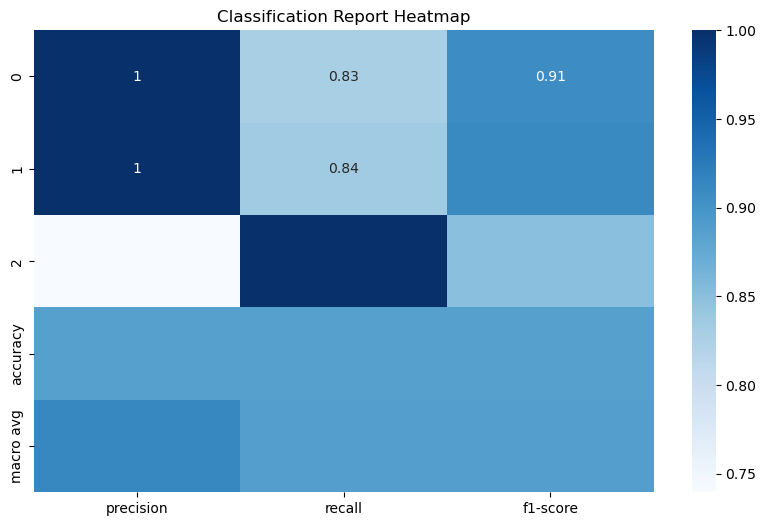

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you have already calculated the predicted_stress_level
report_dict = classification_report(test_data['stress_level'], test_data['predicted_stress_level'], output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Drop the 'support' column if not needed for visualization
report_df = report_df.drop('support', axis=1)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()
